<a href="https://colab.research.google.com/github/Ratchadakorn26/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MIDTERM

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

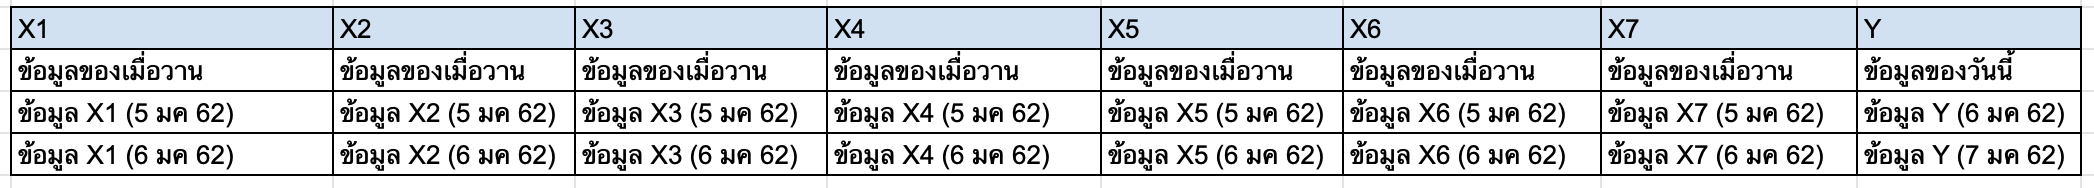

##เชื่อมgoogle drive

In [1928]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1929]:
import pandas as pd

In [1930]:
import numpy as np

In [1931]:
import os

#นำเข้ามูลเข้า

##นำเข้าข้อมูลความกด(เปอร์เซ็น)ของทั้ง 5 จังหวัด


In [1932]:
 Ap_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
 Ap_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
 Ap_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
 Ap_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
 Ap_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

In [1933]:
 Ap_lei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


In [1934]:
  Ap_kkn=Ap_kkn.replace('352201-หนองคาย จ.หนองคาย','381201-ขอนแก่น จ.ขอนแก่น')
  Ap_npm=Ap_npm.replace('352201-หนองคาย จ.หนองคาย','357201-นครพนม จ.นครพนม')
  Ap_snk= Ap_snk.replace('352201-หนองคาย จ.หนองคาย','356201-สกลนคร จ.สกลนคร')
  Ap_lei=Ap_lei.replace('352201-หนองคาย จ.หนองคาย','353301-เลย สกษ. จ.เลย')

##นำเข้าข้อมูลความชื้นสัมพัทธ์(เปอร์เซ็น)ของทั้ง 5 จังหวัด

In [1935]:
Rh_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
Rh_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
Rh_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
Rh_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
Rh_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

In [1936]:
Rh_lei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


##นำเข้าข้อมูลความเร็วลม(นอต)ของทั้ง 5 จังหวัด

In [1937]:
Av_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
Av_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
Av_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
Av_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
Av_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)

In [1938]:
Av_kkn.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [1939]:
Av_kkn=Av_kkn.replace('353301-เลย สกษ. จ.เลย','381201-ขอนแก่น จ.ขอนแก่น')
Av_npm=Av_npm.replace('353301-เลย สกษ. จ.เลย','357201-นครพนม จ.นครพนม')
Av_snk=Av_snk.replace('353301-เลย สกษ. จ.เลย','356201-สกลนคร จ.สกลนคร')
Av_nki=Av_nki.replace('353301-เลย สกษ. จ.เลย','352201-หนองคาย จ.หนองคาย')

##นำเข้าข้อมูลจำนวนเมฆ(10ส่วน)ของทั้ง 5 จังหวัด

In [1940]:
Cl_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
Cl_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
Cl_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
Cl_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
Cl_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)

In [1941]:
Cl_kkn=Cl_kkn.replace('353301-เลย สกษ. จ.เลย','381201-ขอนแก่น จ.ขอนแก่น')
Cl_npm=Cl_npm.replace('353301-เลย สกษ. จ.เลย','357201-นครพนม จ.นครพนม')
Cl_snk=Cl_snk.replace('353301-เลย สกษ. จ.เลย','356201-สกลนคร จ.สกลนคร')
Cl_nki=Cl_nki.replace('353301-เลย สกษ. จ.เลย','352201-หนองคาย จ.หนองคาย')

ลบคอลัมที่เกินมาของจำนวนเมฆ(จ.เลย)

In [1942]:
#พบว่าคอลัมจำนวนเมฆในจ.เลย มีคอลัมที่เกินมา
Cl_lei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1943]:
Cl_lei = Cl_lei.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])

In [1944]:
Cl_lei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2.809524


##นำเข้าข้อมูลปริมาณฝน(มิลลิเมตร)ของทั้ง 5 จังหวัด

In [1945]:
R_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
R_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
R_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
R_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
R_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)

In [1946]:
R_kkn

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0,0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0,0,0,0,0,0,...,0,0,30,0,0,0,0,0,-,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2,5.4,0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,-


In [1947]:
R_npm.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


##นำเข้าข้อมูลอุณหภูมิจุดน้ำค้าง(เซลเซียส)ของทั้ง 5 จังหวัด

In [1948]:
Dew_tem_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dew_tem_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dew_tem_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dew_tem_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dew_tem_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)

In [1949]:
Dew_tem_kkn.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


##นำเข้าข้อมูลอุณหภูมิตุ้มแห้ง(เซลเซียส)ของทั้ง 5 จังหวัด

In [1950]:
Dry_tem_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Dry_tem_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Dry_tem_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
Dry_tem_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Dry_tem_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)

In [1951]:
Dry_tem_lei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


##นำเข้าข้อมูลอุณหภูมิต่ำสุด(เซลเซียส)ของทั้ง 5 จังหวัด

In [1952]:
Mini_tem_kkn=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
Mini_tem_npm=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
Mini_tem_snk=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
Mini_tem_nki=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
Mini_tem_lei=pd.read_excel('/content/drive/MyDrive/data mining/สภาพอากาศ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)

In [1953]:
Mini_tem_kkn.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


#เปลี่ยนชื่อคอลัม

In [1954]:
rp={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือนและปี','Unnamed: 34':'ค่าเฉลี่ย'}

##ความกดอากาศ

In [1955]:
Ap_kkn=Ap_kkn.rename(columns=rp)
Ap_npm=Ap_npm.rename(columns=rp)
Ap_snk=Ap_snk.rename(columns=rp)
Ap_nki=Ap_nki.rename(columns=rp)
Ap_lei=Ap_lei.rename(columns=rp)

In [1956]:
Ap_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


##ความชื้นสัมพัทธ์(เปอร์เซ็น)

In [1957]:
Rh_kkn=Rh_kkn.rename(columns=rp)
Rh_npm=Rh_npm.rename(columns=rp)
Rh_snk=Rh_snk.rename(columns=rp)
Rh_nki=Rh_nki.rename(columns=rp)
Rh_lei=Rh_lei.rename(columns=rp)

In [1958]:
Rh_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


##ความเร็วลม(นอต)

In [1959]:
Av_kkn=Av_kkn.rename(columns=rp)
Av_npm=Av_npm.rename(columns=rp)
Av_snk=Av_snk.rename(columns=rp)
Av_nki=Av_nki.rename(columns=rp)
Av_lei=Av_lei.rename(columns=rp)

In [1960]:
Av_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


##จำนวนเมฆ(10ส่วน)

In [1961]:
Cl_kkn=Cl_kkn.rename(columns=rp)
Cl_npm=Cl_npm.rename(columns=rp)
Cl_snk=Cl_snk.rename(columns=rp)
Cl_nki=Cl_nki.rename(columns=rp)
Cl_lei=Cl_lei.rename(columns=rp)

In [1962]:
Cl_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


##ปริมาณฝน(มิลลิเมตร)

In [1963]:
R_kkn=R_kkn.rename(columns=rp)
R_npm=R_npm.rename(columns=rp)
R_snk=R_snk.rename(columns=rp)
R_nki=R_nki.rename(columns=rp)
R_lei=R_lei.rename(columns=rp)

In [1964]:
R_kkn

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0,0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0,0,0,0,0,0,...,0,0,30,0,0,0,0,0,-,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2,5.4,0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,-


##อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [1965]:
Dew_tem_kkn=Dew_tem_kkn.rename(columns=rp)
Dew_tem_npm=Dew_tem_npm.rename(columns=rp)
Dew_tem_snk=Dew_tem_snk.rename(columns=rp)
Dew_tem_nki=Dew_tem_nki.rename(columns=rp)
Dew_tem_lei=Dew_tem_lei.rename(columns=rp)

In [1966]:
Dew_tem_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


##อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [1967]:
Dry_tem_kkn=Dry_tem_kkn.rename(columns=rp)
Dry_tem_npm=Dry_tem_npm.rename(columns=rp)
Dry_tem_snk=Dry_tem_snk.rename(columns=rp)
Dry_tem_nki=Dry_tem_nki.rename(columns=rp)
Dry_tem_lei=Dry_tem_lei.rename(columns=rp)

In [1968]:
Dry_tem_kkn.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


##อุณหภูมิต่ำสุด(เซลเซียส)

In [1969]:
Mini_tem_kkn=Mini_tem_kkn.rename(columns=rp)
Mini_tem_npm=Mini_tem_npm.rename(columns=rp)
Mini_tem_snk=Mini_tem_snk.rename(columns=rp)
Mini_tem_nki=Mini_tem_nki.rename(columns=rp)
Mini_tem_lei=Mini_tem_lei.rename(columns=rp)

In [1970]:
Mini_tem_nki.head()

,ที่,สถานี,เดือนและปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


#เช็คค่าMissing

##เปลี่ยน-ให้เป็นค่าNaN

###ความกดอากาศ

In [1971]:
Ap_kkn=Ap_kkn.replace('-',np.NaN)
Ap_npm=Ap_npm.replace('-',np.NaN)
Ap_snk=Ap_snk.replace('-',np.NaN)
Ap_nki=Ap_nki.replace('-',np.NaN)
Ap_lei=Ap_lei.replace('-',np.NaN)

In [1972]:
Ap_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ความชื้นสัมพัทธ์(เปอร์เซ็น)

In [1973]:
Rh_kkn=Rh_kkn.replace('-',np.NaN)
Rh_npm=Rh_npm.replace('-',np.NaN)
Rh_snk=Rh_snk.replace('-',np.NaN)
Rh_nki=Rh_nki.replace('-',np.NaN)
Rh_lei=Rh_lei.replace('-',np.NaN)

In [1974]:
Rh_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29             True
30             True
31             True
ค่าเฉลี่ย     False
dtype: bool

###ความเร็วลม(นอต)

In [1975]:
Av_kkn=Av_kkn.replace('-',np.NaN)
Av_npm=Av_npm.replace('-',np.NaN)
Av_snk=Av_snk.replace('-',np.NaN)
Av_nki=Av_nki.replace('-',np.NaN)
Av_lei=Av_lei.replace('-',np.NaN)

###จำนวนเมฆ(10ส่วน)

In [1976]:
Cl_kkn=Cl_kkn.replace('-',np.NaN)
Cl_npm=Cl_npm.replace('-',np.NaN)
Cl_snk=Cl_snk.replace('-',np.NaN)
Cl_nki=Cl_nki.replace('-',np.NaN)
Cl_lei=Cl_lei.replace('-',np.NaN)

###ปริมาณฝน(มิลลิเมตร)

In [1977]:
R_kkn=R_kkn.replace('-',np.NaN)
R_npm=R_npm.replace('-',np.NaN)
R_snk=R_snk.replace('-',np.NaN)
R_nki=R_nki.replace('-',np.NaN)
R_lei=R_lei.replace('-',np.NaN)

###อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [1978]:
Dew_tem_kkn=Dew_tem_kkn.replace('-',np.NaN)
Dew_tem_npm=Dew_tem_npm.replace('-',np.NaN)
Dew_tem_snk=Dew_tem_snk.replace('-',np.NaN)
Dew_tem_nki=Dew_tem_nki.replace('-',np.NaN)
Dew_tem_lei=Dew_tem_lei.replace('-',np.NaN)

###อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [1979]:
Dry_tem_kkn=Dry_tem_kkn.replace('-',np.NaN)
Dry_tem_npm=Dry_tem_npm.replace('-',np.NaN)
Dry_tem_snk=Dry_tem_snk.replace('-',np.NaN)
Dry_tem_nki=Dry_tem_nki.replace('-',np.NaN)
Dry_tem_lei=Dry_tem_lei.replace('-',np.NaN)

###อุณหภูมิต่ำสุด(เซลเซียส)

In [1980]:
Mini_tem_kkn=Mini_tem_kkn.replace('-',np.NaN)
Mini_tem_npm=Mini_tem_npm.replace('-',np.NaN)
Mini_tem_snk=Mini_tem_snk.replace('-',np.NaN)
Mini_tem_nki=Mini_tem_nki.replace('-',np.NaN)
Mini_tem_lei=Mini_tem_lei.replace('-',np.NaN)

##แก้ค่าmissing ด้วยค่าเฉลี่ยของแต่ละเดือน

###ความกดอากาศ

In [1981]:
for Ap in range(len(Ap_kkn['ที่'])):
  Ap_kkn.iloc[Ap,:]=Ap_kkn.iloc[Ap,:].fillna(Ap_kkn.iloc[Ap]['ค่าเฉลี่ย'])
for Ap in range(len(Ap_npm['ที่'])):
  Ap_npm.iloc[Ap,:]=Ap_npm.iloc[Ap,:].fillna(Ap_npm.iloc[Ap]['ค่าเฉลี่ย'])
for Ap in range(len(Ap_snk['ที่'])):
  Ap_snk.iloc[Ap,:]=Ap_snk.iloc[Ap,:].fillna(Ap_snk.iloc[Ap]['ค่าเฉลี่ย'])
for Ap in range(len(Ap_nki['ที่'])):
  Ap_nki.iloc[Ap,:]=Ap_nki.iloc[Ap,:].fillna(Ap_nki.iloc[Ap]['ค่าเฉลี่ย'])
for Ap in range(len(Ap_lei['ที่'])):
  Ap_lei.iloc[Ap,:]=Ap_lei.iloc[Ap,:].fillna(Ap_lei.iloc[Ap]['ค่าเฉลี่ย'])

In [1982]:
Ap_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1983]:
Ap_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1984]:
Ap_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1985]:
Ap_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1986]:
Ap_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###ความชื้นสัมพัทธ์(เปอร์เซ็น)





In [1987]:
for Rh in range(len(Rh_kkn['ที่'])):
  Rh_kkn.iloc[Rh,:]=Rh_kkn.iloc[Rh,:].fillna(Rh_kkn.iloc[Rh]['ค่าเฉลี่ย'])
for Rh in range(len(Rh_npm['ที่'])):
  Rh_npm.iloc[Rh,:]=Rh_npm.iloc[Rh,:].fillna(Rh_npm.iloc[Rh]['ค่าเฉลี่ย'])
for Rh in range(len(Rh_snk['ที่'])):
  Rh_snk.iloc[Rh,:]=Rh_snk.iloc[Rh,:].fillna(Rh_snk.iloc[Rh]['ค่าเฉลี่ย'])
for Rh in range(len(Rh_nki['ที่'])):
  Rh_nki.iloc[Rh,:]=Rh_nki.iloc[Rh,:].fillna(Rh_nki.iloc[Rh]['ค่าเฉลี่ย'])
for Rh in range(len(Rh_lei['ที่'])):
  Rh_lei.iloc[Rh,:]=Rh_lei.iloc[Rh,:].fillna(Rh_lei.iloc[Rh]['ค่าเฉลี่ย'])

In [1988]:
Rh_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1989]:
 Rh_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1990]:
 Rh_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1991]:
 Rh_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1992]:
 Rh_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###ความเร็วลม(นอต)

In [1993]:
for Av in range(len(Av_kkn['ที่'])):
  Av_kkn.iloc[Av,:]=Av_kkn.iloc[Av,:].fillna(Av_kkn.iloc[Av]['ค่าเฉลี่ย'])
for Av in range(len(Av_npm['ที่'])):
  Av_npm.iloc[Av,:]=Av_npm.iloc[Av,:].fillna(Av_npm.iloc[Av]['ค่าเฉลี่ย'])
for Av in range(len(Av_snk['ที่'])):
  Av_snk.iloc[Av,:]=Av_snk.iloc[Av,:].fillna(Av_snk.iloc[Av]['ค่าเฉลี่ย'])
for Av in range(len(Av_nki['ที่'])):
  Av_nki.iloc[Av,:]=Av_nki.iloc[Av,:].fillna(Av_nki.iloc[Av]['ค่าเฉลี่ย'])
for Av in range(len(Av_lei['ที่'])):
  Av_lei.iloc[Av,:]=Av_lei.iloc[Av,:].fillna(Av_lei.iloc[Av]['ค่าเฉลี่ย'])

In [1994]:
Av_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1995]:
Av_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1996]:
Av_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1997]:
Av_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [1998]:
Av_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###จำนวนเมฆ(10ส่วน)

In [1999]:
for Cl in range(len(Cl_kkn['ที่'])):
  Cl_kkn.iloc[Cl,:]=Cl_kkn.iloc[Cl,:].fillna(Cl_kkn.iloc[Cl]['ค่าเฉลี่ย'])
for Cl in range(len(Cl_npm['ที่'])):
  Cl_npm.iloc[Cl,:]=Cl_npm.iloc[Cl,:].fillna(Cl_npm.iloc[Cl]['ค่าเฉลี่ย'])
for Cl in range(len(Cl_snk['ที่'])):
  Cl_snk.iloc[Cl,:]=Cl_snk.iloc[Cl,:].fillna(Cl_snk.iloc[Cl]['ค่าเฉลี่ย'])
for Cl in range(len(Cl_nki['ที่'])):
  Cl_nki.iloc[Cl,:]=Cl_nki.iloc[Cl,:].fillna(Cl_nki.iloc[Cl]['ค่าเฉลี่ย'])
for Cl in range(len(Cl_lei['ที่'])):
  Cl_lei.iloc[Cl,:]=Cl_lei.iloc[Cl,:].fillna(Cl_lei.iloc[Cl]['ค่าเฉลี่ย'])

In [2000]:
Cl_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2001]:
Cl_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2002]:
Cl_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2003]:
Cl_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2004]:
Cl_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###ปริมาณฝน(มิลลิเมตร)

In [2005]:
for t in range(len(R_kkn['ที่'])):
  R_kkn.iloc[t,:]=R_kkn.iloc[t,:].fillna(R_kkn.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(R_npm['ที่'])):
  R_npm.iloc[t,:]=R_npm.iloc[t,:].fillna(R_npm.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(R_snk['ที่'])):
  R_snk.iloc[t,:]=R_snk.iloc[t,:].fillna(R_snk.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(R_nki['ที่'])):
  R_nki.iloc[t,:]=R_nki.iloc[t,:].fillna(R_nki.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(R_lei['ที่'])):
  R_lei.iloc[t,:]=R_lei.iloc[t,:].fillna(R_lei.iloc[t]['ค่าเฉลี่ย'])

In [2006]:
R_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2007]:
R_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14            False
15             True
16             True
17             True
18             True
19            False
20             True
21            False
22             True
23             True
24            False
25             True
26            False
27            False
28            False
29            False
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2008]:
R_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2009]:
R_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2010]:
R_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1              True
2              True
3              True
4              True
5              True
6              True
7              True
8              True
9              True
10             True
11             True
12             True
13             True
14             True
15             True
16             True
17             True
18             True
19             True
20             True
21             True
22             True
23             True
24             True
25             True
26             True
27             True
28             True
29             True
30             True
31             True
ค่าเฉลี่ย      True
dtype: bool

In [2011]:
#ปริมาณฝนขอนแก่น
R_kkn=R_kkn.replace('T',0.1)
R_kkn=R_kkn.replace('-',0)
R_kkn=R_kkn.fillna(0)
##ปริมาณฝนนครพนม
R_npm=R_npm.replace('T',0.1)
R_npm=R_npm.replace('-',0)
R_npm=R_npm.fillna(0)
#ปริมาณฝนสกลนคร
R_snk=R_snk.replace('T',0.1)
R_snk=R_snk.replace('-',0)
R_snk=R_snk.fillna(0)
#ปริมาณฝนหนองคาย
R_nki=R_nki.replace('T',0.1)
R_nki=R_nki.replace('-',0)
R_nki=R_nki.fillna(0)
#ปริมาณฝนเลย
R_lei=R_lei.replace('T',0.1)
R_lei=R_lei.replace('-',0)
R_lei=R_lei.fillna(0)

In [2012]:
R_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2013]:
R_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2014]:
R_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2015]:
R_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2016]:
R_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [2017]:
for t in range(len(Dew_tem_kkn['ที่'])):
  Dew_tem_kkn.iloc[t,:]=Dew_tem_kkn.iloc[t,:].fillna(Dew_tem_kkn.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dew_tem_npm['ที่'])):
  Dew_tem_npm.iloc[t,:]=Dew_tem_npm.iloc[t,:].fillna(Dew_tem_npm.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dew_tem_snk['ที่'])):
  Dew_tem_snk.iloc[t,:]=Dew_tem_snk.iloc[t,:].fillna(Dew_tem_snk.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dew_tem_nki['ที่'])):
  Dew_tem_nki.iloc[t,:]=Dew_tem_nki.iloc[t,:].fillna(Dew_tem_nki.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dew_tem_lei['ที่'])):
  Dew_tem_lei.iloc[t,:]=Dew_tem_lei.iloc[t,:].fillna(Dew_tem_lei.iloc[t]['ค่าเฉลี่ย'])

In [2018]:
 Dew_tem_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2019]:
Dew_tem_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2020]:
Dew_tem_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2021]:
Dew_tem_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2022]:
Dew_tem_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [2023]:
for t in range(len(Dry_tem_kkn['ที่'])):
  Dry_tem_kkn.iloc[t,:]=Dry_tem_kkn.iloc[t,:].fillna(Dry_tem_kkn.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dry_tem_npm['ที่'])):
  Dry_tem_npm.iloc[t,:]=Dry_tem_npm.iloc[t,:].fillna(Dry_tem_npm.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dry_tem_snk['ที่'])):
  Dry_tem_snk.iloc[t,:]=Dry_tem_snk.iloc[t,:].fillna(Dry_tem_snk.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dry_tem_nki['ที่'])):
  Dry_tem_nki.iloc[t,:]=Dry_tem_nki.iloc[t,:].fillna(Dry_tem_nki.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Dry_tem_lei['ที่'])):
  Dry_tem_lei.iloc[t,:]=Dry_tem_lei.iloc[t,:].fillna(Dry_tem_lei.iloc[t]['ค่าเฉลี่ย'])

In [2024]:
 Dry_tem_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2025]:
 Dry_tem_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2026]:
 Dry_tem_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2027]:
 Dry_tem_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2028]:
 Dry_tem_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

###อุณหภูมิต่ำสุด(เซลเซียส)

In [2029]:
for t in range(len(Mini_tem_kkn['ที่'])):
  Mini_tem_kkn.iloc[t,:]=Mini_tem_kkn.iloc[t,:].fillna(Mini_tem_kkn.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Mini_tem_npm['ที่'])):
  Mini_tem_npm.iloc[t,:]=Mini_tem_npm.iloc[t,:].fillna(Mini_tem_npm.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Mini_tem_snk['ที่'])):
  Mini_tem_snk.iloc[t,:]=Mini_tem_snk.iloc[t,:].fillna(Mini_tem_snk.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Mini_tem_nki['ที่'])):
  Mini_tem_nki.iloc[t,:]=Mini_tem_nki.iloc[t,:].fillna(Mini_tem_nki.iloc[t]['ค่าเฉลี่ย'])
for t in range(len(Mini_tem_lei['ที่'])):
  Mini_tem_lei.iloc[t,:]=Mini_tem_lei.iloc[t,:].fillna(Mini_tem_lei.iloc[t]['ค่าเฉลี่ย'])

In [2030]:
Mini_tem_kkn.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2031]:
Mini_tem_npm.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2032]:
Mini_tem_snk.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2033]:
Mini_tem_nki.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

In [2034]:
Mini_tem_lei.isnull().any()

ที่           False
สถานี         False
เดือนและปี    False
1             False
2             False
3             False
4             False
5             False
6             False
7             False
8             False
9             False
10            False
11            False
12            False
13            False
14            False
15            False
16            False
17            False
18            False
19            False
20            False
21            False
22            False
23            False
24            False
25            False
26            False
27            False
28            False
29            False
30            False
31            False
ค่าเฉลี่ย     False
dtype: bool

#จัดการข้อมูล(เรียงคอลัมใหม่,เพิ่มคอลัมPrimary key,Dropคอลัมที่ไม่จำเป็น)

##ความกดอากาศ

In [2035]:
#จังหวัดขอนแก่น
Ap_kkn['Year'] = Ap_kkn['เดือนและปี'].dt.year
Ap_kkn['Month'] = Ap_kkn['เดือนและปี'].dt.month
Ap_kkn = Ap_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Ap_kkn = Ap_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)ขอนแก่น','level_2':'Day'})
Ap_kkn['id']=["ss{}".format(i) for i in range(len(Ap_kkn['Month']))]

In [2036]:
Ap_kkn

,Year,Month,Day,ความกดอากาศ(%)ขอนแก่น,id
0,2011,10,1,1005.470000,ss0
1,2011,10,2,1006.650000,ss1
2,2011,10,3,1007.490000,ss2
3,2011,10,4,1008.280000,ss3
4,2011,10,5,1009.880000,ss4
...,...,...,...,...,...
1700,2022,2,27,1014.370000,ss1700
1701,2022,2,28,1013.040000,ss1701
1702,2022,2,29,1013.370000,ss1702
1703,2022,2,30,1013.980000,ss1703


In [2037]:
#จังหวัดนครพนม
Ap_npm['Year'] = Ap_npm['เดือนและปี'].dt.year
Ap_npm['Month'] = Ap_npm['เดือนและปี'].dt.month
Ap_npm = Ap_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Ap_npm = Ap_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)นครพนม','level_2':'Day'})
Ap_npm['id']=["ss{}".format(i) for i in range(len(Ap_npm['Month']))]

In [2038]:
Ap_npm

,Year,Month,Day,ความกดอากาศ(%)นครพนม,id
0,2011,10,1,1006.300,ss0
1,2011,10,2,1007.380,ss1
2,2011,10,3,1008.070,ss2
3,2011,10,4,1008.440,ss3
4,2011,10,5,1010.510,ss4
...,...,...,...,...,...
1700,2022,2,27,1016.430,ss1700
1701,2022,2,28,1013.530,ss1701
1702,2022,2,29,1013.370,ss1702
1703,2022,2,30,1013.980,ss1703


In [2039]:
#จังหวัดสกลนคร
Ap_snk['Year'] = Ap_snk['เดือนและปี'].dt.year
Ap_snk['Month'] = Ap_snk['เดือนและปี'].dt.month
Ap_snk = Ap_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Ap_snk = Ap_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)สกลนคร','level_2':'Day'})
Ap_snk['id']=["ss{}".format(i) for i in range(len(Ap_snk['Month']))]

In [2040]:
Ap_snk.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Year,Month,Day,ความกดอากาศ(%)สกลนคร,id
0,2011,10,1,1005.84,ss0
1,2011,10,2,1007.16,ss1
2,2011,10,3,1007.87,ss2
3,2011,10,4,1008.56,ss3
4,2011,10,5,1010.55,ss4


In [2041]:
#จังหวัดหนองคาย
Ap_nki['Year'] = Ap_nki['เดือนและปี'].dt.year
Ap_nki['Month'] = Ap_nki['เดือนและปี'].dt.month
Ap_nki = Ap_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Ap_nki = Ap_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)หนองคาย','level_2':'Day'})
Ap_nki['id']=["ss{}".format(i) for i in range(len(Ap_nki['Month']))]

In [2042]:
Ap_nki.head()

,Year,Month,Day,ความกดอากาศ(%)หนองคาย,id
0,2011,10,1,1005.34,ss0
1,2011,10,2,1006.67,ss1
2,2011,10,3,1007.39,ss2
3,2011,10,4,1008.11,ss3
4,2011,10,5,1009.69,ss4


In [2043]:
#จังหวัดเลย
Ap_lei['Year'] = Ap_lei['เดือนและปี'].dt.year
Ap_lei['Month'] = Ap_lei['เดือนและปี'].dt.month
Ap_lei = Ap_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Ap_lei = Ap_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)เลย','level_2':'Day'})
Ap_lei['id']=["ss{}".format(i) for i in range(len(Ap_lei['Month']))]

In [2044]:
Ap_lei.head()

,Year,Month,Day,ความกดอากาศ(%)เลย,id
0,2011,10,1,1005.12,ss0
1,2011,10,2,1006.51,ss1
2,2011,10,3,1007.81,ss2
3,2011,10,4,1008.15,ss3
4,2011,10,5,1009.21,ss4


##ความชื้นสัมพัทธ์(เปอร์เซ็น)

In [2045]:
#จังหวัดขอนแก่น
Rh_kkn['Year'] = Rh_kkn['เดือนและปี'].dt.year
Rh_kkn['Month'] = Rh_kkn['เดือนและปี'].dt.month
Rh_kkn = Rh_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rh_kkn = Rh_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื่นสัมพัทธ์(%)ขอนแก่น','level_2':'Day'})
Rh_kkn['id']=["ss{}".format(i) for i in range(len(Rh_kkn['Month']))]

In [2046]:
Rh_kkn.head()

,Year,Month,Day,ความชื่นสัมพัทธ์(%)ขอนแก่น,id
0,2011,10,1,83.0,ss0
1,2011,10,2,92.0,ss1
2,2011,10,3,86.0,ss2
3,2011,10,4,80.0,ss3
4,2011,10,5,86.0,ss4


In [2047]:
#จังหวัดนครพนม
Rh_npm['Year'] = Rh_npm['เดือนและปี'].dt.year
Rh_npm['Month'] = Rh_npm['เดือนและปี'].dt.month
Rh_npm = Rh_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rh_npm = Rh_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื่นสัมพัทธ์(%)นครพนม','level_2':'Day'})
Rh_npm['id']=["ss{}".format(i) for i in range(len(Rh_npm['Month']))]

In [2048]:
Rh_npm.head()

,Year,Month,Day,ความชื่นสัมพัทธ์(%)นครพนม,id
0,2011,10,1,95.0,ss0
1,2011,10,2,84.0,ss1
2,2011,10,3,74.0,ss2
3,2011,10,4,72.0,ss3
4,2011,10,5,87.0,ss4


In [2049]:
#จังหวัดสกลนคร
Rh_snk['Year'] = Rh_snk['เดือนและปี'].dt.year
Rh_snk['Month'] = Rh_snk['เดือนและปี'].dt.month
Rh_snk = Rh_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rh_snk = Rh_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื่นสัมพัทธ์(%)สกลนคร','level_2':'Day'})
Rh_snk['id']=["ss{}".format(i) for i in range(len(Rh_snk['Month']))]

In [2050]:
Rh_snk.head()

,Year,Month,Day,ความชื่นสัมพัทธ์(%)สกลนคร,id
0,2011,10,1,87.0,ss0
1,2011,10,2,88.0,ss1
2,2011,10,3,77.0,ss2
3,2011,10,4,75.0,ss3
4,2011,10,5,87.0,ss4


In [2051]:
#จังหวัดหนองคาย
Rh_nki['Year'] = Rh_nki['เดือนและปี'].dt.year
Rh_nki['Month'] = Rh_nki['เดือนและปี'].dt.month
Rh_nki = Rh_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rh_nki = Rh_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื่นสัมพัทธ์(%)หนองคาย','level_2':'Day'})
Rh_nki['id']=["ss{}".format(i) for i in range(len(Rh_nki['Month']))]

In [2052]:
Rh_nki.head()

,Year,Month,Day,ความชื่นสัมพัทธ์(%)หนองคาย,id
0,2011,10,1,89.0,ss0
1,2011,10,2,91.0,ss1
2,2011,10,3,78.0,ss2
3,2011,10,4,75.0,ss3
4,2011,10,5,90.0,ss4


In [2053]:
#จังหวัดเลย
Rh_lei['Year'] = Rh_lei['เดือนและปี'].dt.year
Rh_lei['Month'] = Rh_lei['เดือนและปี'].dt.month
Rh_lei = Rh_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Rh_lei = Rh_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื่นสัมพัทธ์(%)เลย','level_2':'Day'})
Rh_lei['id']=["ss{}".format(i) for i in range(len(Rh_lei['Month']))]

In [2054]:
Rh_lei.head()

,Year,Month,Day,ความชื่นสัมพัทธ์(%)เลย,id
0,2011,10,1,90.0,ss0
1,2011,10,2,95.0,ss1
2,2011,10,3,92.0,ss2
3,2011,10,4,89.0,ss3
4,2011,10,5,86.0,ss4


##ความเร็วลม(นอต)

In [2055]:
#จังหวัดขอนแก่น
Av_kkn['Year'] = Av_kkn['เดือนและปี'].dt.year
Av_kkn['Month'] = Av_kkn['เดือนและปี'].dt.month
Av_kkn = Av_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Av_kkn = Av_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)ขอนแก่น','level_2':'Day'})
Av_kkn['id']=["ss{}".format(i) for i in range(len(Av_kkn['Month']))]

In [2056]:
Av_kkn.head()

,Year,Month,Day,ความเร็วลม(นอต)ขอนแก่น,id
0,2011,10,1,3.0,ss0
1,2011,10,2,2.0,ss1
2,2011,10,3,3.0,ss2
3,2011,10,4,2.0,ss3
4,2011,10,5,2.0,ss4


In [2057]:
#จังหวัดนครพนม
Av_npm['Year'] = Av_npm['เดือนและปี'].dt.year
Av_npm['Month'] = Av_npm['เดือนและปี'].dt.month
Av_npm = Av_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Av_npm = Av_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)นครพนม','level_2':'Day'})
Av_npm['id']=["ss{}".format(i) for i in range(len(Av_npm['Month']))]

In [2058]:
Av_npm.head()

,Year,Month,Day,ความเร็วลม(นอต)นครพนม,id
0,2011,10,1,1.0,ss0
1,2011,10,2,1.0,ss1
2,2011,10,3,2.0,ss2
3,2011,10,4,2.0,ss3
4,2011,10,5,1.0,ss4


In [2059]:
#จังหวัดสกลนคร
Av_snk['Year'] = Av_snk['เดือนและปี'].dt.year
Av_snk['Month'] = Av_snk['เดือนและปี'].dt.month
Av_snk = Av_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Av_snk = Av_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)สกลนคร','level_2':'Day'})
Av_snk['id']=["ss{}".format(i) for i in range(len(Av_snk['Month']))]

In [2060]:
Av_snk.head()

,Year,Month,Day,ความเร็วลม(นอต)สกลนคร,id
0,2011,10,1,1.0,ss0
1,2011,10,2,1.0,ss1
2,2011,10,3,2.0,ss2
3,2011,10,4,2.0,ss3
4,2011,10,5,1.0,ss4


In [2061]:
#จังหวัดหนองคาย
Av_nki['Year'] = Av_nki['เดือนและปี'].dt.year
Av_nki['Month'] = Av_nki['เดือนและปี'].dt.month
Av_nki = Av_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Av_nki = Av_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)หนองคาย','level_2':'Day'})
Av_nki['id']=["ss{}".format(i) for i in range(len(Av_nki['Month']))]

In [2062]:
Av_nki.head()

,Year,Month,Day,ความเร็วลม(นอต)หนองคาย,id
0,2011,10,1,1.0,ss0
1,2011,10,2,4.0,ss1
2,2011,10,3,4.0,ss2
3,2011,10,4,2.0,ss3
4,2011,10,5,1.0,ss4


In [2063]:
#จังหวัดเลย
Av_lei['Year'] = Av_lei['เดือนและปี'].dt.year
Av_lei['Month'] = Av_lei['เดือนและปี'].dt.month
Av_lei = Av_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Av_lei = Av_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม(นอต)เลย','level_2':'Day'})
Av_lei['id']=["ss{}".format(i) for i in range(len(Av_lei['Month']))]

In [2064]:
Av_lei.head()

,Year,Month,Day,ความเร็วลม(นอต)เลย,id
0,2011,10,1,2.0,ss0
1,2011,10,2,2.0,ss1
2,2011,10,3,3.0,ss2
3,2011,10,4,2.0,ss3
4,2011,10,5,3.0,ss4


##จำนวนเมฆ(10ส่วน)

In [2065]:
#จังหวัดขอนแก่น
Cl_kkn['Year'] = Cl_kkn['เดือนและปี'].dt.year
Cl_kkn['Month'] = Cl_kkn['เดือนและปี'].dt.month
Cl_kkn = Cl_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cl_kkn = Cl_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)ขอนแก่น','level_2':'Day'})
Cl_kkn['id']=["ss{}".format(i) for i in range(len(Cl_kkn['Month']))]

In [2066]:
Cl_kkn.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน)ขอนแก่น,id
0,2011,10,1,9.0,ss0
1,2011,10,2,10.0,ss1
2,2011,10,3,10.0,ss2
3,2011,10,4,8.0,ss3
4,2011,10,5,10.0,ss4


In [2067]:
#จังหวัดนครพนม
Cl_npm['Year'] = Cl_npm['เดือนและปี'].dt.year
Cl_npm['Month'] = Cl_npm['เดือนและปี'].dt.month
Cl_npm = Cl_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cl_npm = Cl_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)นครพนม','level_2':'Day'})
Cl_npm['id']=["ss{}".format(i) for i in range(len(Cl_npm['Month']))]

In [2068]:
Cl_npm.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน)นครพนม,id
0,2011,10,1,10.0,ss0
1,2011,10,2,7.0,ss1
2,2011,10,3,8.0,ss2
3,2011,10,4,8.0,ss3
4,2011,10,5,10.0,ss4


In [2069]:
#จังหวัดสกลนคร
Cl_snk['Year'] = Cl_snk['เดือนและปี'].dt.year
Cl_snk['Month'] = Cl_snk['เดือนและปี'].dt.month
Cl_snk = Cl_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cl_snk = Cl_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)สกลนคร','level_2':'Day'})
Cl_snk['id']=["ss{}".format(i) for i in range(len(Cl_snk['Month']))]

In [2070]:
Cl_snk.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน)สกลนคร,id
0,2011,10,1,9.0,ss0
1,2011,10,2,9.0,ss1
2,2011,10,3,7.0,ss2
3,2011,10,4,7.0,ss3
4,2011,10,5,9.0,ss4


In [2071]:
#จังหวัดหนองคาย
Cl_nki['Year'] = Cl_nki['เดือนและปี'].dt.year
Cl_nki['Month'] = Cl_nki['เดือนและปี'].dt.month
Cl_nki = Cl_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cl_nki = Cl_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)หนองคาย','level_2':'Day'})
Cl_nki['id']=["ss{}".format(i) for i in range(len(Cl_nki['Month']))]

In [2072]:
Cl_nki.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน)หนองคาย,id
0,2011,10,1,10.0,ss0
1,2011,10,2,10.0,ss1
2,2011,10,3,8.0,ss2
3,2011,10,4,9.0,ss3
4,2011,10,5,9.0,ss4


In [2073]:
#จังหวัดเลย
Cl_lei['Year'] = Cl_lei['เดือนและปี'].dt.year
Cl_lei['Month'] = Cl_lei['เดือนและปี'].dt.month
Cl_lei = Cl_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Cl_lei = Cl_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ(10ส่วน)เลย','level_2':'Day'})
Cl_lei['id']=["ss{}".format(i) for i in range(len(Cl_lei['Month']))]

In [2074]:
Cl_lei.head()

,Year,Month,Day,จำนวนเมฆ(10ส่วน)เลย,id
0,2011,10,1,8.0,ss0
1,2011,10,2,10.0,ss1
2,2011,10,3,10.0,ss2
3,2011,10,4,9.0,ss3
4,2011,10,5,8.0,ss4


##ปริมาณฝน(มิลลิเมตร)

In [2075]:
#จังหวัดขอนแก่น
R_kkn['Year'] = R_kkn['เดือนและปี'].dt.year
R_kkn['Month'] = R_kkn['เดือนและปี'].dt.month
R_kkn = R_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
R_kkn = R_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)ขอนแก่น','level_2':'Day'})
R_kkn['id']=["ss{}".format(i) for i in range(len(R_kkn['Month']))]

In [2076]:
R_kkn.head()

,Year,Month,Day,ปริมาณฝน(มิลลิเมตร)ขอนแก่น,id
0,2011,10,1,1.4,ss0
1,2011,10,2,17.7,ss1
2,2011,10,3,3.0,ss2
3,2011,10,4,0.0,ss3
4,2011,10,5,2.2,ss4


In [2077]:
#จังหวัดนครพนม
R_npm['Year'] = R_npm['เดือนและปี'].dt.year
R_npm['Month'] = R_npm['เดือนและปี'].dt.month
R_npm = R_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
R_npm = R_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)นครพนม','level_2':'Day'})
R_npm['id']=["ss{}".format(i) for i in range(len(R_npm['Month']))]

In [2078]:
R_npm.head()

,Year,Month,Day,ปริมาณฝน(มิลลิเมตร)นครพนม,id
0,2011,10,1,17.0,ss0
1,2011,10,2,0.3,ss1
2,2011,10,3,0.0,ss2
3,2011,10,4,0.3,ss3
4,2011,10,5,1.9,ss4


In [2079]:
#จังหวัดสกลนคร
R_snk['Year'] = R_snk['เดือนและปี'].dt.year
R_snk['Month'] = R_snk['เดือนและปี'].dt.month
R_snk = R_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
R_snk = R_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)สกลนคร','level_2':'Day'})
R_snk['id']=["ss{}".format(i) for i in range(len(R_snk['Month']))]

In [2080]:
R_snk.head()

,Year,Month,Day,ปริมาณฝน(มิลลิเมตร)สกลนคร,id
0,2011,10,1,84.8,ss0
1,2011,10,2,28.1,ss1
2,2011,10,3,0.0,ss2
3,2011,10,4,0.1,ss3
4,2011,10,5,5.5,ss4


In [2081]:
#จังหวัดหนองคาย
R_nki['Year'] = R_nki['เดือนและปี'].dt.year
R_nki['Month'] = R_nki['เดือนและปี'].dt.month
R_nki = R_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
R_nki = R_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)หนองคาย','level_2':'Day'})
R_nki['id']=["ss{}".format(i) for i in range(len(R_nki['Month']))]

In [2082]:
R_nki.head()

,Year,Month,Day,ปริมาณฝน(มิลลิเมตร)หนองคาย,id
0,2011,10,1,48.6,ss0
1,2011,10,2,59.0,ss1
2,2011,10,3,0.0,ss2
3,2011,10,4,1.0,ss3
4,2011,10,5,19.1,ss4


In [2083]:
#จังหวัดเลย
R_lei['Year'] = R_lei['เดือนและปี'].dt.year
R_lei['Month'] = R_lei['เดือนและปี'].dt.month
R_lei = R_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
R_lei = R_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน(มิลลิเมตร)เลย','level_2':'Day'})
R_lei['id']=["ss{}".format(i) for i in range(len(R_lei['Month']))]

In [2084]:
R_lei.head()

,Year,Month,Day,ปริมาณฝน(มิลลิเมตร)เลย,id
0,2011,10,1,21.6,ss0
1,2011,10,2,111.4,ss1
2,2011,10,3,0.4,ss2
3,2011,10,4,0.0,ss3
4,2011,10,5,0.0,ss4


##อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [2085]:
#จังหวัดขอนแก่น
Dew_tem_kkn['Year'] = Dew_tem_kkn['เดือนและปี'].dt.year
Dew_tem_kkn['Month'] = Dew_tem_kkn['เดือนและปี'].dt.month
Dew_tem_kkn = Dew_tem_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dew_tem_kkn = Dew_tem_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)ขอนแก่น','level_2':'Day'})
Dew_tem_kkn['id']=["ss{}".format(i) for i in range(len(Dew_tem_kkn['Month']))]

In [ ]:
##ความชื้นสัมพัทธ์(เปอร์เซ็น)
Rh_kkn=Rh_kkn[['id','ความชื่นสัมพัทธ์(%)ขอนแก่น']]
Rh_npm=Rh_npm[['id','ความชื่นสัมพัทธ์(%)นครพนม']]
Rh_snk=Rh_snk[['id','ความชื่นสัมพัทธ์(%)สกลนคร']]
Rh_nki=Rh_nki[['id','ความชื่นสัมพัทธ์(%)หนองคาย']]
Rh_lei=Rh_lei[['id','ความชื่นสัมพัทธ์(%)เลย']]
##ความเร็วลม(นอต)
Av_kkn=Av_kkn[['id','ความเร็วลม(นอต)ขอนแก่น']]
Av_npm=Av_npm[['id','ความเร็วลม(นอต)นครพนม']]
Av_snk=Av_snk[['id','ความเร็วลม(นอต)สกลนคร']]
Av_nki=Av_nki[['id','ความเร็วลม(นอต)หนองคาย']]
Av_lei=Av_lei[['id','ความเร็วลม(นอต)เลย']]
##จำนวนเมฆ(10ส่วน)
Cl_kkn=Cl_kkn[['id','จำนวนเมฆ(10ส่วน)ขอนแก่น']]
Cl_npm=Cl_npm[['id','จำนวนเมฆ(10ส่วน)นครพนม']]
Cl_snk=Cl_snk[['id','จำนวนเมฆ(10ส่วน)สกลนคร']]
Cl_nki=Cl_nki[['id','จำนวนเมฆ(10ส่วน)หนองคาย']]
Cl_lei=Cl_lei[['id','จำนวนเมฆ(10ส่วน)เลย']]
##ปริมาณฝน(มิลลิเมตร)
R_kkn=R_kkn[['id','ปริมาณฝน(มิลลิเมตร)ขอนแก่น']]
R_npm=R_npm[['id','ปริมาณฝน(มิลลิเมตร)นครพนม']]
R_snk=R_snk[['id','ปริมาณฝน(มิลลิเมตร)สกลนคร']]
R_nki=R_nki[['id','ปริมาณฝน(มิลลิเมตร)หนองคาย']]
R_lei=R_lei[['id','ปริมาณฝน(มิลลิเมตร)เลย']]
##อุณหภูมิจุดน้ำค้าง(เซลเซียส)
Wind_velocity_KhonKaen_mit=Wind_velocity_KhonKaen_mit[['id','ความเร็วลม(นอต)']]
Wind_velocity_NakhonPhanom_mit=Wind_velocity_NakhonPhanom_mit[['id','ความเร็วลม(นอต)']]
Wind_velocity_Sakon_mit=Wind_velocity_Sakon_mit[['id','ความเร็วลม(นอต)']]
Wind_velocity_NongKhai_mit=Wind_velocity_NongKhai_mit[['id','ความเร็วลม(นอต)']]
Wind_velocity_loei_mit=Wind_velocity_loei_mit[['id','ความเร็วลม(นอต)']]
##อุณหภูมิตุ้มแห้ง(เซลเซียส)
Clouds_KhonKaen_mit=Clouds_KhonKaen_mit[['id','จำนวนเมฆ(10ส่วน)']]
Clouds_NakhonPhanom_mit=Clouds_NakhonPhanom_mit[['id','จำนวนเมฆ(10ส่วน)']]
Clouds_Sakon_mit=Clouds_Sakon_mit[['id','จำนวนเมฆ(10ส่วน)']]
Clouds_NongKhai_mit=Clouds_NongKhai_mit[['id','จำนวนเมฆ(10ส่วน)']]
Clouds_loei_mit=Clouds_loei_mit[['id','จำนวนเมฆ(10ส่วน)']]
##อุณหภูมิต่ำสุด(เซลเซียส)
Rainfall_KhonKaen_mit=Rainfall_KhonKaen_mit[['id','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_NakhonPhanom_mit=Rainfall_NakhonPhanom_mit[['id','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_Sakon_mit=Rainfall_Sakon_mit[['id','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_NongKhai_mit=Rainfall_NongKhai_mit[['id','ปริมาณฝน(มิลลิเมตร)']]
Rainfall_loei_mit=Rainfall_loei_mit[['id','ปริมาณฝน(มิลลิเมตร)']]

In [2086]:
Dew_tem_kkn.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส)ขอนแก่น,id
0,2011,10,1,24.2,ss0
1,2011,10,2,24.0,ss1
2,2011,10,3,22.9,ss2
3,2011,10,4,21.9,ss3
4,2011,10,5,21.7,ss4


In [2087]:
#จังหวัดนครพนม
Dew_tem_npm['Year'] = Dew_tem_npm['เดือนและปี'].dt.year
Dew_tem_npm['Month'] = Dew_tem_npm['เดือนและปี'].dt.month
Dew_tem_npm = Dew_tem_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dew_tem_npm = Dew_tem_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)นครพนม','level_2':'Day'})
Dew_tem_npm['id']=["ss{}".format(i) for i in range(len(Dew_tem_npm['Month']))]

In [2088]:
Dew_tem_npm.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส)นครพนม,id
0,2011,10,1,25.1,ss0
1,2011,10,2,23.1,ss1
2,2011,10,3,20.1,ss2
3,2011,10,4,18.9,ss3
4,2011,10,5,20.7,ss4


In [2089]:
#จังหวัดสกลนคร
Dew_tem_snk['Year'] = Dew_tem_snk['เดือนและปี'].dt.year
Dew_tem_snk['Month'] = Dew_tem_snk['เดือนและปี'].dt.month
Dew_tem_snk = Dew_tem_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dew_tem_snk = Dew_tem_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)สกลนคร','level_2':'Day'})
Dew_tem_snk['id']=["ss{}".format(i) for i in range(len(Dew_tem_snk['Month']))]

In [2090]:
Dew_tem_snk.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส)สกลนคร,id
0,2011,10,1,24.5,ss0
1,2011,10,2,23.6,ss1
2,2011,10,3,21.1,ss2
3,2011,10,4,20.0,ss3
4,2011,10,5,21.2,ss4


In [2091]:
#จังหวัดหนองคาย
Dew_tem_nki['Year'] = Dew_tem_nki['เดือนและปี'].dt.year
Dew_tem_nki['Month'] = Dew_tem_nki['เดือนและปี'].dt.month
Dew_tem_nki = Dew_tem_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dew_tem_nki = Dew_tem_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)หนองคาย','level_2':'Day'})
Dew_tem_nki['id']=["ss{}".format(i) for i in range(len(Dew_tem_nki['Month']))]

In [2092]:
Dew_tem_nki.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส)หนองคาย,id
0,2011,10,1,24.6,ss0
1,2011,10,2,23.8,ss1
2,2011,10,3,22.4,ss2
3,2011,10,4,21.9,ss3
4,2011,10,5,23.3,ss4


In [2093]:
#จังหวัดเลย
Dew_tem_lei['Year'] = Dew_tem_lei['เดือนและปี'].dt.year
Dew_tem_lei['Month'] = Dew_tem_lei['เดือนและปี'].dt.month
Dew_tem_lei = Dew_tem_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dew_tem_lei = Dew_tem_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง(เซลเซียส)เลย','level_2':'Day'})
Dew_tem_lei['id']=["ss{}".format(i) for i in range(len(Dew_tem_lei['Month']))]

In [2094]:
Dew_tem_lei.head()

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง(เซลเซียส)เลย,id
0,2011,10,1,23.6,ss0
1,2011,10,2,23.5,ss1
2,2011,10,3,21.9,ss2
3,2011,10,4,21.9,ss3
4,2011,10,5,21.8,ss4


##อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [2095]:
#จังหวัดขอนแก่น
Dry_tem_kkn['Year'] = Dry_tem_kkn['เดือนและปี'].dt.year
Dry_tem_kkn['Month'] = Dry_tem_kkn['เดือนและปี'].dt.month
Dry_tem_kkn = Dry_tem_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dry_tem_kkn = Dry_tem_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)ขอนแก่น','level_2':'Day'})
Dry_tem_kkn['id']=["ss{}".format(i) for i in range(len(Dry_tem_kkn['Month']))]

In [2096]:
Dry_tem_kkn.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส)ขอนแก่น,id
0,2011,10,1,27.6,ss0
1,2011,10,2,25.6,ss1
2,2011,10,3,25.6,ss2
3,2011,10,4,25.8,ss3
4,2011,10,5,24.3,ss4


In [2097]:
#จังหวัดนครพนม
Dry_tem_npm['Year'] = Dry_tem_npm['เดือนและปี'].dt.year
Dry_tem_npm['Month'] = Dry_tem_npm['เดือนและปี'].dt.month
Dry_tem_npm = Dry_tem_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dry_tem_npm = Dry_tem_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)นครพนม','level_2':'Day'})
Dry_tem_npm['id']=["ss{}".format(i) for i in range(len(Dry_tem_npm['Month']))]

In [2098]:
Dry_tem_npm.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส)นครพนม,id
0,2011,10,1,25.9,ss0
1,2011,10,2,26.1,ss1
2,2011,10,3,25.3,ss2
3,2011,10,4,24.7,ss3
4,2011,10,5,23.1,ss4


In [2099]:
#จังหวัดสกลนคร
Dry_tem_snk['Year'] = Dry_tem_snk['เดือนและปี'].dt.year
Dry_tem_snk['Month'] = Dry_tem_snk['เดือนและปี'].dt.month
Dry_tem_snk = Dry_tem_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dry_tem_snk = Dry_tem_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)สกลนคร','level_2':'Day'})
Dry_tem_snk['id']=["ss{}".format(i) for i in range(len(Dry_tem_snk['Month']))]

In [2100]:
Dry_tem_snk.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส)สกลนคร,id
0,2011,10,1,26.9,ss0
1,2011,10,2,25.9,ss1
2,2011,10,3,25.7,ss2
3,2011,10,4,25.2,ss3
4,2011,10,5,23.6,ss4


In [2101]:
#จังหวัดหนองคาย
Dry_tem_nki['Year'] = Dry_tem_nki['เดือนและปี'].dt.year
Dry_tem_nki['Month'] = Dry_tem_nki['เดือนและปี'].dt.month
Dry_tem_nki = Dry_tem_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dry_tem_nki = Dry_tem_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)หนองคาย','level_2':'Day'})
Dry_tem_nki['id']=["ss{}".format(i) for i in range(len(Dry_tem_nki['Month']))]

In [2102]:
Dry_tem_nki.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส)หนองคาย,id
0,2011,10,1,26.7,ss0
1,2011,10,2,25.5,ss1
2,2011,10,3,27.0,ss2
3,2011,10,4,26.8,ss3
4,2011,10,5,24.9,ss4


In [2103]:
#จังหวัดเลย
Dry_tem_lei['Year'] = Dry_tem_lei['เดือนและปี'].dt.year
Dry_tem_lei['Month'] = Dry_tem_lei['เดือนและปี'].dt.month
Dry_tem_lei = Dry_tem_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Dry_tem_lei = Dry_tem_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)เลย','level_2':'Day'})
Dry_tem_lei['id']=["ss{}".format(i) for i in range(len(Dry_tem_lei['Month']))]

In [2104]:
Dry_tem_lei.head()

,Year,Month,Day,อุณหภูมิตุ้มแห้ง(เซลเซียส)เลย,id
0,2011,10,1,26.3,ss0
1,2011,10,2,25.1,ss1
2,2011,10,3,24.4,ss2
3,2011,10,4,25.2,ss3
4,2011,10,5,25.6,ss4


##อุณหภูมิต่ำสุด(เซลเซียส)

In [2105]:
#จังหวัดขอนแก่น
Mini_tem_kkn['Year'] = Mini_tem_kkn['เดือนและปี'].dt.year
Mini_tem_kkn['Month'] = Mini_tem_kkn['เดือนและปี'].dt.month
Mini_tem_kkn = Mini_tem_kkn.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Mini_tem_kkn = Mini_tem_kkn.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)ขอนแก่น','level_2':'Day'})
Mini_tem_kkn['id']=["ss{}".format(i) for i in range(len(Mini_tem_kkn['Month']))]

In [2106]:
Mini_tem_kkn.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส)ขอนแก่น,id
0,2011,10,1,24.8,ss0
1,2011,10,2,23.0,ss1
2,2011,10,3,22.1,ss2
3,2011,10,4,22.8,ss3
4,2011,10,5,23.1,ss4


In [2107]:
#จังหวัดนครพนม
Mini_tem_npm['Year'] = Mini_tem_npm['เดือนและปี'].dt.year
Mini_tem_npm['Month'] = Mini_tem_npm['เดือนและปี'].dt.month
Mini_tem_npm = Mini_tem_npm.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Mini_tem_npm = Mini_tem_npm.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)นครพนม','level_2':'Day'})
Mini_tem_npm['id']=["ss{}".format(i) for i in range(len(Mini_tem_npm['Month']))]

In [2108]:
Mini_tem_npm.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส)นครพนม,id
0,2011,10,1,25.0,ss0
1,2011,10,2,23.4,ss1
2,2011,10,3,22.2,ss2
3,2011,10,4,20.6,ss3
4,2011,10,5,21.1,ss4


In [2109]:
#จังหวัดสกลนคร
Mini_tem_snk['Year'] = Mini_tem_snk['เดือนและปี'].dt.year
Mini_tem_snk['Month'] = Mini_tem_snk['เดือนและปี'].dt.month
Mini_tem_snk = Mini_tem_snk.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Mini_tem_snk = Mini_tem_snk.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)สกลนคร','level_2':'Day'})
Mini_tem_snk['id']=["ss{}".format(i) for i in range(len(Mini_tem_snk['Month']))]

In [2110]:
Mini_tem_snk.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส)สกลนคร,id
0,2011,10,1,24.5,ss0
1,2011,10,2,23.1,ss1
2,2011,10,3,22.6,ss2
3,2011,10,4,21.8,ss3
4,2011,10,5,22.5,ss4


In [2111]:
#จังหวัดหนองคาย
Mini_tem_nki['Year'] = Mini_tem_nki['เดือนและปี'].dt.year
Mini_tem_nki['Month'] = Mini_tem_nki['เดือนและปี'].dt.month
Mini_tem_nki = Mini_tem_nki.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Mini_tem_nki = Mini_tem_nki.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)หนองคาย','level_2':'Day'})
Mini_tem_nki['id']=["ss{}".format(i) for i in range(len(Mini_tem_nki['Month']))]

In [2112]:
Mini_tem_nki.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส)หนองคาย,id
0,2011,10,1,25.3,ss0
1,2011,10,2,23.3,ss1
2,2011,10,3,23.6,ss2
3,2011,10,4,23.8,ss3
4,2011,10,5,23.3,ss4


In [2113]:
#จังหวัดเลย
Mini_tem_lei['Year'] = Mini_tem_lei['เดือนและปี'].dt.year
Mini_tem_lei['Month'] = Mini_tem_lei['เดือนและปี'].dt.month
Mini_tem_lei = Mini_tem_lei.drop(['เดือนและปี','ค่าเฉลี่ย','สถานี'], axis =1)
Mini_tem_lei = Mini_tem_lei.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด(เซลเซียส)เลย','level_2':'Day'})
Mini_tem_lei['id']=["ss{}".format(i) for i in range(len(Mini_tem_lei['Month']))]

In [2114]:
Mini_tem_lei.head()

,Year,Month,Day,อุณหภูมิต่ำสุด(เซลเซียส)เลย,id
0,2011,10,1,23.5,ss0
1,2011,10,2,24.3,ss1
2,2011,10,3,22.5,ss2
3,2011,10,4,23.0,ss3
4,2011,10,5,22.7,ss4


#รวมตาราง

##เลือกแค่ค่าที่ต้องการ (Xi,id)เพื่อเอาไป เชื่อมตาราง
เมื่อ Xแทนสภาพต่างๆ
iแทนจังหวัด